# -----------> **AI SMART TIC-TAC-TOE: MINIMAX SVM** <-----------

# 1. Loading and Reading Dataset Header

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\CODECLAUSE -AI ENGINEERING\Tic-Tac-Toe AI\Data\Tic tac initial results.csv"
df = pd.read_csv(data_path)

# Display the dataset header
print(df.head())


   MOVE1 MOVE2 MOVE3 MOVE4 MOVE5 MOVE6 MOVE7 CLASS
0      0     8     1     3     ?     ?     ?  loss
1      4     7     2     6     ?     ?     ?   win
2      0     8     1     6     5     ?     ?  draw
3      4     7     2     3     ?     ?     ?  draw
4      0     4     2     1     ?     ?     ?   win


# 2. Handling Missing Values

In [2]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Display the number of missing values in each column
print(df.isnull().sum())

# Fill missing values with 9 (out of range for Tic-Tac-Toe moves 0-8)
df.fillna(9, inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())


MOVE1       0
MOVE2       1
MOVE3     218
MOVE4     828
MOVE5    1803
MOVE6    2428
MOVE7    2431
CLASS       0
dtype: int64
MOVE1    0
MOVE2    0
MOVE3    0
MOVE4    0
MOVE5    0
MOVE6    0
MOVE7    0
CLASS    0
dtype: int64


# 3. Data Preparation and Preprocessing

In [3]:
# Map the 'CLASS' column to numerical values
class_mapping = {'loss': 0, 'win': 1, 'draw': 2}
df['CLASS'] = df['CLASS'].map(class_mapping)

# Now, convert the 'CLASS' column to integer
df['CLASS'] = df['CLASS'].astype(int)

# Convert MOVE columns to integer types if not already
df[['MOVE1', 'MOVE2', 'MOVE3', 'MOVE4', 'MOVE5', 'MOVE6', 'MOVE7']] = df[['MOVE1', 'MOVE2', 'MOVE3', 'MOVE4', 'MOVE5', 'MOVE6', 'MOVE7']].astype(int)

# Verify the data types
print(df.dtypes)


MOVE1    int32
MOVE2    int32
MOVE3    int32
MOVE4    int32
MOVE5    int32
MOVE6    int32
MOVE7    int32
CLASS    int32
dtype: object


# 4. Exploratory Data Analysis (EDA)

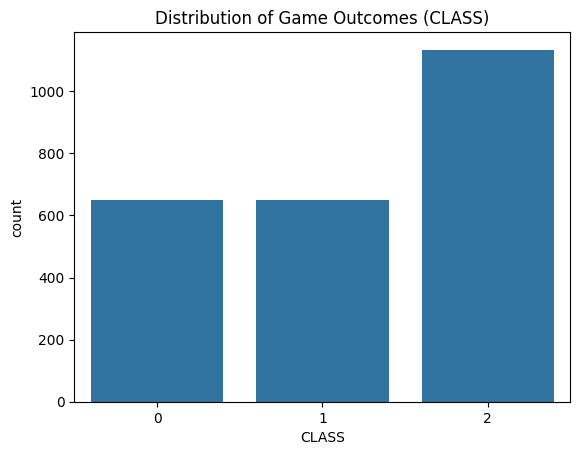

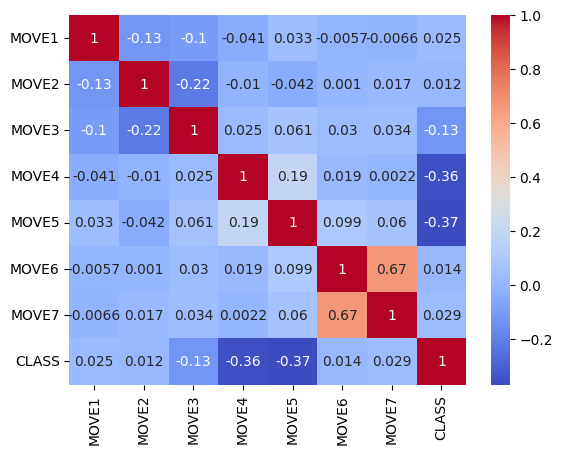

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target class
sns.countplot(x='CLASS', data=df)
plt.title('Distribution of Game Outcomes (CLASS)')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


# 5. Splitting Data, Validation, and Cross-Validation

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split data into features (X) and target (y)
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optional: Cross-validation
from sklearn.svm import SVC
svm = SVC()
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.69501466 0.68621701 0.67741935 0.70381232 0.70087977]


# 6. Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale,

# 7. Modeling with SVM

In [7]:
# Train the model using the best parameters
svm_model = SVC(C=grid.best_params_['C'], kernel=grid.best_params_['kernel'], gamma=grid.best_params_['gamma'])
svm_model.fit(X_train, y_train)


SVC(C=10, gamma='auto')

# 8. Evaluation

In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7318741450068399
              precision    recall  f1-score   support

           0       0.61      0.51      0.56       208
           1       0.57      0.61      0.59       183
           2       0.88      0.93      0.90       340

    accuracy                           0.73       731
   macro avg       0.69      0.68      0.68       731
weighted avg       0.73      0.73      0.73       731



# 9. Game Interface Using GUI

In [48]:
import tkinter as tk
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Sample model setup (Assuming you have trained your SVM model)
svm_model = SVC(C=1, kernel='linear', gamma='scale')  # Example model parameters

# Dummy function to simulate predicting AI's move (for demo purposes)
def predict_move(board):
    return minimax(board, -1)  # AI is O (-1)

def minimax(board, player):
    # Check for terminal state
    if check_winner_state(board, 1):  # Player X (1) wins
        return -1
    elif check_winner_state(board, -1):  # AI O (-1) wins
        return 1
    elif 0 not in board:  # Draw
        return 0

    if player == -1:  # AI's turn
        best_score = -float('inf')
        best_move = -1
        for i in range(9):
            if board[i] == 0:
                board[i] = player
                score = minimax(board, 1)  # Switch player
                board[i] = 0  # Undo move
                if score > best_score:
                    best_score = score
                    best_move = i
        return best_move
    else:  # Player's turn
        best_score = float('inf')
        for i in range(9):
            if board[i] == 0:
                board[i] = player
                score = minimax(board, -1)  # Switch player
                board[i] = 0  # Undo move
                best_score = min(best_score, score)
        return best_score

def check_winner_state(board, player):
    # Winning combinations
    combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),
                    (0, 3, 6), (1, 4, 7), (2, 5, 8),
                    (0, 4, 8), (2, 4, 6)]
    
    for combo in combinations:
        if all(board[i] == player for i in combo):
            return True
    return False

# Tic Tac Toe GUI class
class TicTacToe:
    def __init__(self, root):
        self.root = root
        self.root.title("Tic Tac Toe")
        self.board = [0] * 9  # 0: empty, 1: X, -1: O
        self.buttons = []
        self.create_board()
        
    def create_board(self):
        for i in range(9):
            button = tk.Button(self.root, text='', font=('Arial', 40), width=10, height=4,  # Increased font size and button dimensions
                               command=lambda i=i: self.player_move(i))
            button.grid(row=i // 3, column=i % 3)
            self.buttons.append(button)

    def player_move(self, i):
        if self.board[i] == 0:
            self.board[i] = 1  # Player is X
            self.buttons[i].config(text='X')
            if not self.check_winner(1):  # Check for player win
                self.ai_move()
    
    def ai_move(self):
        move = predict_move(self.board)
        self.board[move] = -1  # AI is O
        self.buttons[move].config(text='O')
        self.check_winner(-1)  # Check for AI win

    def check_winner(self, player):
        if check_winner_state(self.board, player):
            self.show_winner(player)
            return True
        if 0 not in self.board:  # Check for a draw
            self.show_draw()
        return False

    def show_winner(self, player):
        winner = "Player" if player == 1 else "AI"
        tk.messagebox.showinfo("Game Over", f"{winner} wins!")
        self.reset_game()

    def show_draw(self):
        tk.messagebox.showinfo("Game Over", "It's a draw!")
        self.reset_game()

    def reset_game(self):
        self.board = [0] * 9
        for button in self.buttons:
            button.config(text='')

# Main function to run the application
if __name__ == "__main__":
    root = tk.Tk()
    game = TicTacToe(root)
    root.mainloop()
